In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score

In [2]:
# import data iklim
kemayoran = pd.read_excel(r"Kemayoran.xlsx", sheet_name = "Iklim")
kemayoran.head()

,tanggal,rataan_curah_hujan,rataan_suhu,rataan_kecepatan_angin,rataan_kelembapan,Cempaka Putih Barat,Cempaka Putih Timur,Rawasari,Cideng,Duri Pulo,...,Duri Selatan,Duri Utara,Jembatan Besi,Jembatan Lima,Kali Anyar,Krendang,Pekojan,Roa Malaka,Tambora,Tanah Sereal
0,2013-01-01,1.7,26.2,3.0,91.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-02,0.0,27.9,3.0,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-03,1.3,28.6,4.0,79.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-04,34.4,26.3,5.0,86.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-05,6.4,26.6,4.0,82.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
kemayoran.rename(columns = {"tanggal" : "Tanggal"}, inplace = True)
kemayoran["Tanggal"] = pd.to_datetime(kemayoran["Tanggal"], dayfirst = True)
kemayoran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Columns: 105 entries, Tanggal to Tanah Sereal
dtypes: datetime64[ns](1), float64(4), int64(100)
memory usage: 3.3 MB


In [4]:
kemayoran.set_index("Tanggal", inplace = True)
kemayoran.head()

,rataan_curah_hujan,rataan_suhu,rataan_kecepatan_angin,rataan_kelembapan,Cempaka Putih Barat,Cempaka Putih Timur,Rawasari,Cideng,Duri Pulo,Gambir,...,Duri Selatan,Duri Utara,Jembatan Besi,Jembatan Lima,Kali Anyar,Krendang,Pekojan,Roa Malaka,Tambora,Tanah Sereal
Tanggal,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.7,26.2,3.0,91.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-02,0.0,27.9,3.0,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-03,1.3,28.6,4.0,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-04,34.4,26.3,5.0,86.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-05,6.4,26.6,4.0,82.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# fetch data before 2020-09-14
kemayoran1 = kemayoran[kemayoran.index <= "2020-09-14"]
kemayoran1.tail()

,rataan_curah_hujan,rataan_suhu,rataan_kecepatan_angin,rataan_kelembapan,Cempaka Putih Barat,Cempaka Putih Timur,Rawasari,Cideng,Duri Pulo,Gambir,...,Duri Selatan,Duri Utara,Jembatan Besi,Jembatan Lima,Kali Anyar,Krendang,Pekojan,Roa Malaka,Tambora,Tanah Sereal
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-10,5.26,29.5,2.0,71.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-09-11,7.94,29.3,1.0,70.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-09-12,0.00,29.2,1.0,72.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-09-13,0.00,29.2,2.0,67.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-09-14,0.26,28.9,4.0,71.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PREDICT

In [6]:
# Create X_y
def X_y(dataset, window_size):
    to_array = dataset[["rataan_curah_hujan", "rataan_suhu", "rataan_kecepatan_angin", "rataan_kelembapan"]].to_numpy()
    Y_to_array = dataset.to_numpy()
    X = []
    Y = []
    for i in range(len(to_array) - window_size):
        row = [r for r in to_array[i:i+window_size]]
        X.append(row)
        label = Y_to_array[i+window_size]
        Y.append(label)
    return np.array(X), np.array(Y)

In [7]:
X, Y = X_y(kemayoran1, 365)
X.shape, Y.shape

((2449, 365, 4), (2449, 104))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, shuffle= False)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2204, 365, 4), (245, 365, 4), (2204, 104), (245, 104))

In [9]:
Y1_train = Y_train[:, 4:]  # Select columns from 4th (index 3) onwards for classification (y1_output)
Y2_train = Y_train[:, :4]   # Select columns from 0th (index 0) to 3rd (index 3) for regression (y2_output)

Y1_test = Y_test[:, 4:]  # Select columns from 4th (index 3) onwards for classification (y1_output)
Y2_test = Y_test[:, :4]   # Select columns from 0th (index 0) to 3rd (index 3) for regression (y2_output)
Y1_train.shape, Y2_train.shape, Y1_test.shape, Y2_test.shape

((2204, 100), (2204, 4), (245, 100), (245, 4))

In [28]:
# Define model layers.
input_layer = tf.keras.layers.Input(shape=X.shape[1:])
first_conv1d = tf.keras.layers.Conv1D(128, 30, activation = "relu", 
                                      kernel_regularizer = tf.keras.regularizers.L2(0.05))(input_layer)
first_lstm = tf.keras.layers.LSTM(256, activation = "tanh",
                                  return_sequences = True,
                                  kernel_regularizer = tf.keras.regularizers.L2(0.05))(first_conv1d)
flatten = tf.keras.layers.Flatten()(first_lstm)
first_dense = tf.keras.layers.Dense(1024, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.05))(flatten)
second_dense = tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.05))(first_dense)

# Y1 output 
third_dense_y1 = tf.keras.layers.Dense(256, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.05))(second_dense)
forth_dense_y1 = tf.keras.layers.Dense(200, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.05))(third_dense_y1)
y1_output = tf.keras.layers.Dense(100, activation="sigmoid", name='y1_output')(forth_dense_y1)

# Y2 output 
third_dense_y2 = tf.keras.layers.Dense(64, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.05))(second_dense)
y2_output = tf.keras.layers.Dense(4, name='y2_output')(third_dense_y2)

# Define the model with the input layer and a list of output layers
model = tf.keras.models.Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 365, 4)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 336, 128)  │     15,488 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 336, 256)  │    394,240 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 86016)     │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1024)      │ 88,081,408 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 512)       │    524,800 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │    131,328 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 200)       │     51,400 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │     32,832 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y1_output (Dense)   │ (None, 100)       │     20,100 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y2_output (Dense)   │ (None, 4)         │        260 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 89,251,856 (340.47 MB)

 Trainable params: 89,251,856 (340.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
class WAPE(tf.keras.metrics.Metric):
    def __init__(self, name='wape', **kwargs):
        super(WAPE, self).__init__(name=name, **kwargs)
        self.total_abs_error = self.add_weight(name='total_abs_error', initializer='zeros')
        self.total_actual = self.add_weight(name='total_actual', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        abs_error = tf.abs(y_true - y_pred)
        self.total_abs_error.assign_add(tf.reduce_sum(abs_error))
        self.total_actual.assign_add(tf.reduce_sum(tf.abs(y_true)))
    
    def result(self):
        return tf.math.divide_no_nan(self.total_abs_error, self.total_actual)
    
    def reset_states(self):
        self.total_abs_error.assign(0)
        self.total_actual.assign(0)

class ExplainedVariance(tf.keras.metrics.Metric):
    def __init__(self, name='explained_variance', **kwargs):
        super(ExplainedVariance, self).__init__(name=name, **kwargs)
        self.sum_squared_error = self.add_weight(name='sum_squared_error', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        error = y_true - y_pred
        self.sum_squared_error.assign_add(tf.reduce_sum(tf.square(error)))
        mean_true = tf.reduce_mean(y_true)
        total_error = y_true - mean_true
        self.sum_squared_total.assign_add(tf.reduce_sum(tf.square(total_error)))
    
    def result(self):
        return 1.0 - tf.math.divide_no_nan(self.sum_squared_error, self.sum_squared_total)
    
    def reset_states(self):
        self.sum_squared_error.assign(0)
        self.sum_squared_total.assign(0)

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1_score = self.add_weight(name='f1_score', initializer='zeros')
        self.true_positives = self.add_weight(name='true_positives', initializer='zeros')
        self.false_positives = self.add_weight(name='false_positives', initializer='zeros')
        self.false_negatives = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.transpose(y_true)
        y_pred = tf.transpose(y_pred)
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(tf.round(y_pred), tf.float32)
        self.true_positives.assign_add(tf.reduce_sum(tf.cast(tf.math.equal(y_true, 1) & tf.math.equal(y_pred, 1), tf.float32)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(tf.math.equal(y_true, 0) & tf.math.equal(y_pred, 1), tf.float32)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(tf.math.equal(y_true, 1) & tf.math.equal(y_pred, 0), tf.float32)))
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
        self.f1_score.assign(f1)

    def result(self):
        return self.f1_score

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)
        self.f1_score.assign(0)

In [30]:
class TransposedCategoricalCrossentropy(tf.keras.losses.Loss):
    def __init__(self, name='transposed_categorical_crossentropy', **kwargs):
        super(TransposedCategoricalCrossentropy, self).__init__(name=name, **kwargs)

    def call(self, y_true, y_pred):
        y_true_transposed = tf.transpose(y_true)
        y_pred_transposed = tf.transpose(y_pred)
        loss = tf.keras.losses.categorical_crossentropy(y_true_transposed, y_pred_transposed)
        return loss

In [31]:
model.compile(optimizer=tf.keras.optimizers.Nadam(1e-5),
              loss=[TransposedCategoricalCrossentropy(),
                    tf.keras.losses.MeanSquaredError()], 
              metrics={'y1_output': F1Score(),
                        'y2_output': [ExplainedVariance(), WAPE()]})

In [32]:
# TRANSPOSED
history = model.fit(X_train, [Y1_train, Y2_train],
                    epochs=15,
                    validation_data=[X_test, [Y1_test, Y2_test]])

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - loss: 973.3260 - y1_output_f1_score: 0.0083 - y2_output_explained_variance: 0.1550 - y2_output_wape: 0.6501 - val_loss: 358.1155 - val_y1_output_f1_score: 0.0149 - val_y2_output_explained_variance: 0.8147 - val_y2_output_wape: 0.1391
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 58s 834ms/step - loss: 252.3450 - y1_output_f1_score: 0.0082 - y2_output_explained_variance: 0.9127 - y2_output_wape: 0.1331 - val_loss: 339.1143 - val_y1_output_f1_score: 0.0150 - val_y2_output_explained_variance: 0.8244 - val_y2_output_wape: 0.1373
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 57s 831ms/step - loss: 239.2419 - y1_output_f1_score: 0.0088 - y2_output_explained_variance: 0.9168 - y2_output_wape: 0.1304 - val_loss: 335.5282 - val_y1_output_f1_score: 0.0152 - val_y2_output_explained_variance: 0.8199 - val_y2_output_wape: 0.1316
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 57s 827ms/step - loss: 268.5681 - y1_output_f1_score: 0.0095 - y2_output_explained_variance: 0.88

In [91]:
Y1_pred_train, Y2_pred_train = model.predict(X_train)
Y1_pred_test, Y2_pred_test = model.predict(X_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


In [92]:
Y1_pred_train = (Y1_pred_train > 0.9999).astype(float)
Y1_pred_test = (Y1_pred_test > 0.9990).astype(float)

In [81]:
Y1_pred_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    # print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    # print()
    # print("Confusion Matrix")
    # print()
    # y_actual = pd.Series(np.array(y_test), name = "actual")
    # y_pred = pd.Series(np.array(prediction), name = "prediction")
    # df_confusion = pd.crosstab(y_actual, y_pred)
    # display(df_confusion)
    # print()
    # print()

    # print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    # print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    # print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    # print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    # print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    # print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [97]:
for i in range(100):
  print("=============================================================================================")
  print(f"Kelurahan {i+1} : \n")
  evaluate_classifier_performance(Y1_pred_train[:,i], Y1_train[:,i])

Kelurahan 1 : 

F1 Macro Average: 0.4997730367680436
F1 Micro Average: 0.9990925589836661

Kelurahan 2 : 

F1 Macro Average: 0.49920472619859124
F1 Micro Average: 0.9968239564428312

Kelurahan 3 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 4 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 5 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 6 : 

F1 Macro Average: 0.4997730367680436
F1 Micro Average: 0.9990925589836661

Kelurahan 7 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 8 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 9 : 

F1 Macro Average: 0.4996594778660613
F1 Micro Average: 0.9986388384754991

Kelurahan 10 : 

F1 Macro Average: 0.49943220531455823
F1 Micro Average: 0.9977313974591652

Kelurahan 11 : 

F1 Macro Average: 0.49954586739327883
F1 Micro Average: 0.9981851179673321

Kelurahan 12 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 13 : 

F1 Macro Average: 1.0
F1 Micro Average: 1.0

Kelurahan 14 : 

F1 

In [95]:
for index, column in enumerate(kemayoran1[["rataan_curah_hujan", "rataan_suhu", "rataan_kecepatan_angin", "rataan_kelembapan"]].columns):
  print(f"EVS {column} train : {explained_variance_score(Y2_train[:, index], Y2_pred_train[:, index])}")
  print(f"EVS {column} test : {explained_variance_score(Y2_test[:, index], Y2_pred_test[:, index])}")
  print("=============================================================================================")

EVS rataan_curah_hujan train : 0.18116961862162684
EVS rataan_curah_hujan test : 0.09567282707505731
EVS rataan_suhu train : 0.40020429440430716
EVS rataan_suhu test : 0.17580987085721356
EVS rataan_kecepatan_angin train : 0.12286673788705749
EVS rataan_kecepatan_angin test : -0.10837745111217889
EVS rataan_kelembapan train : 0.5191040750427278
EVS rataan_kelembapan test : 0.4558768279178478


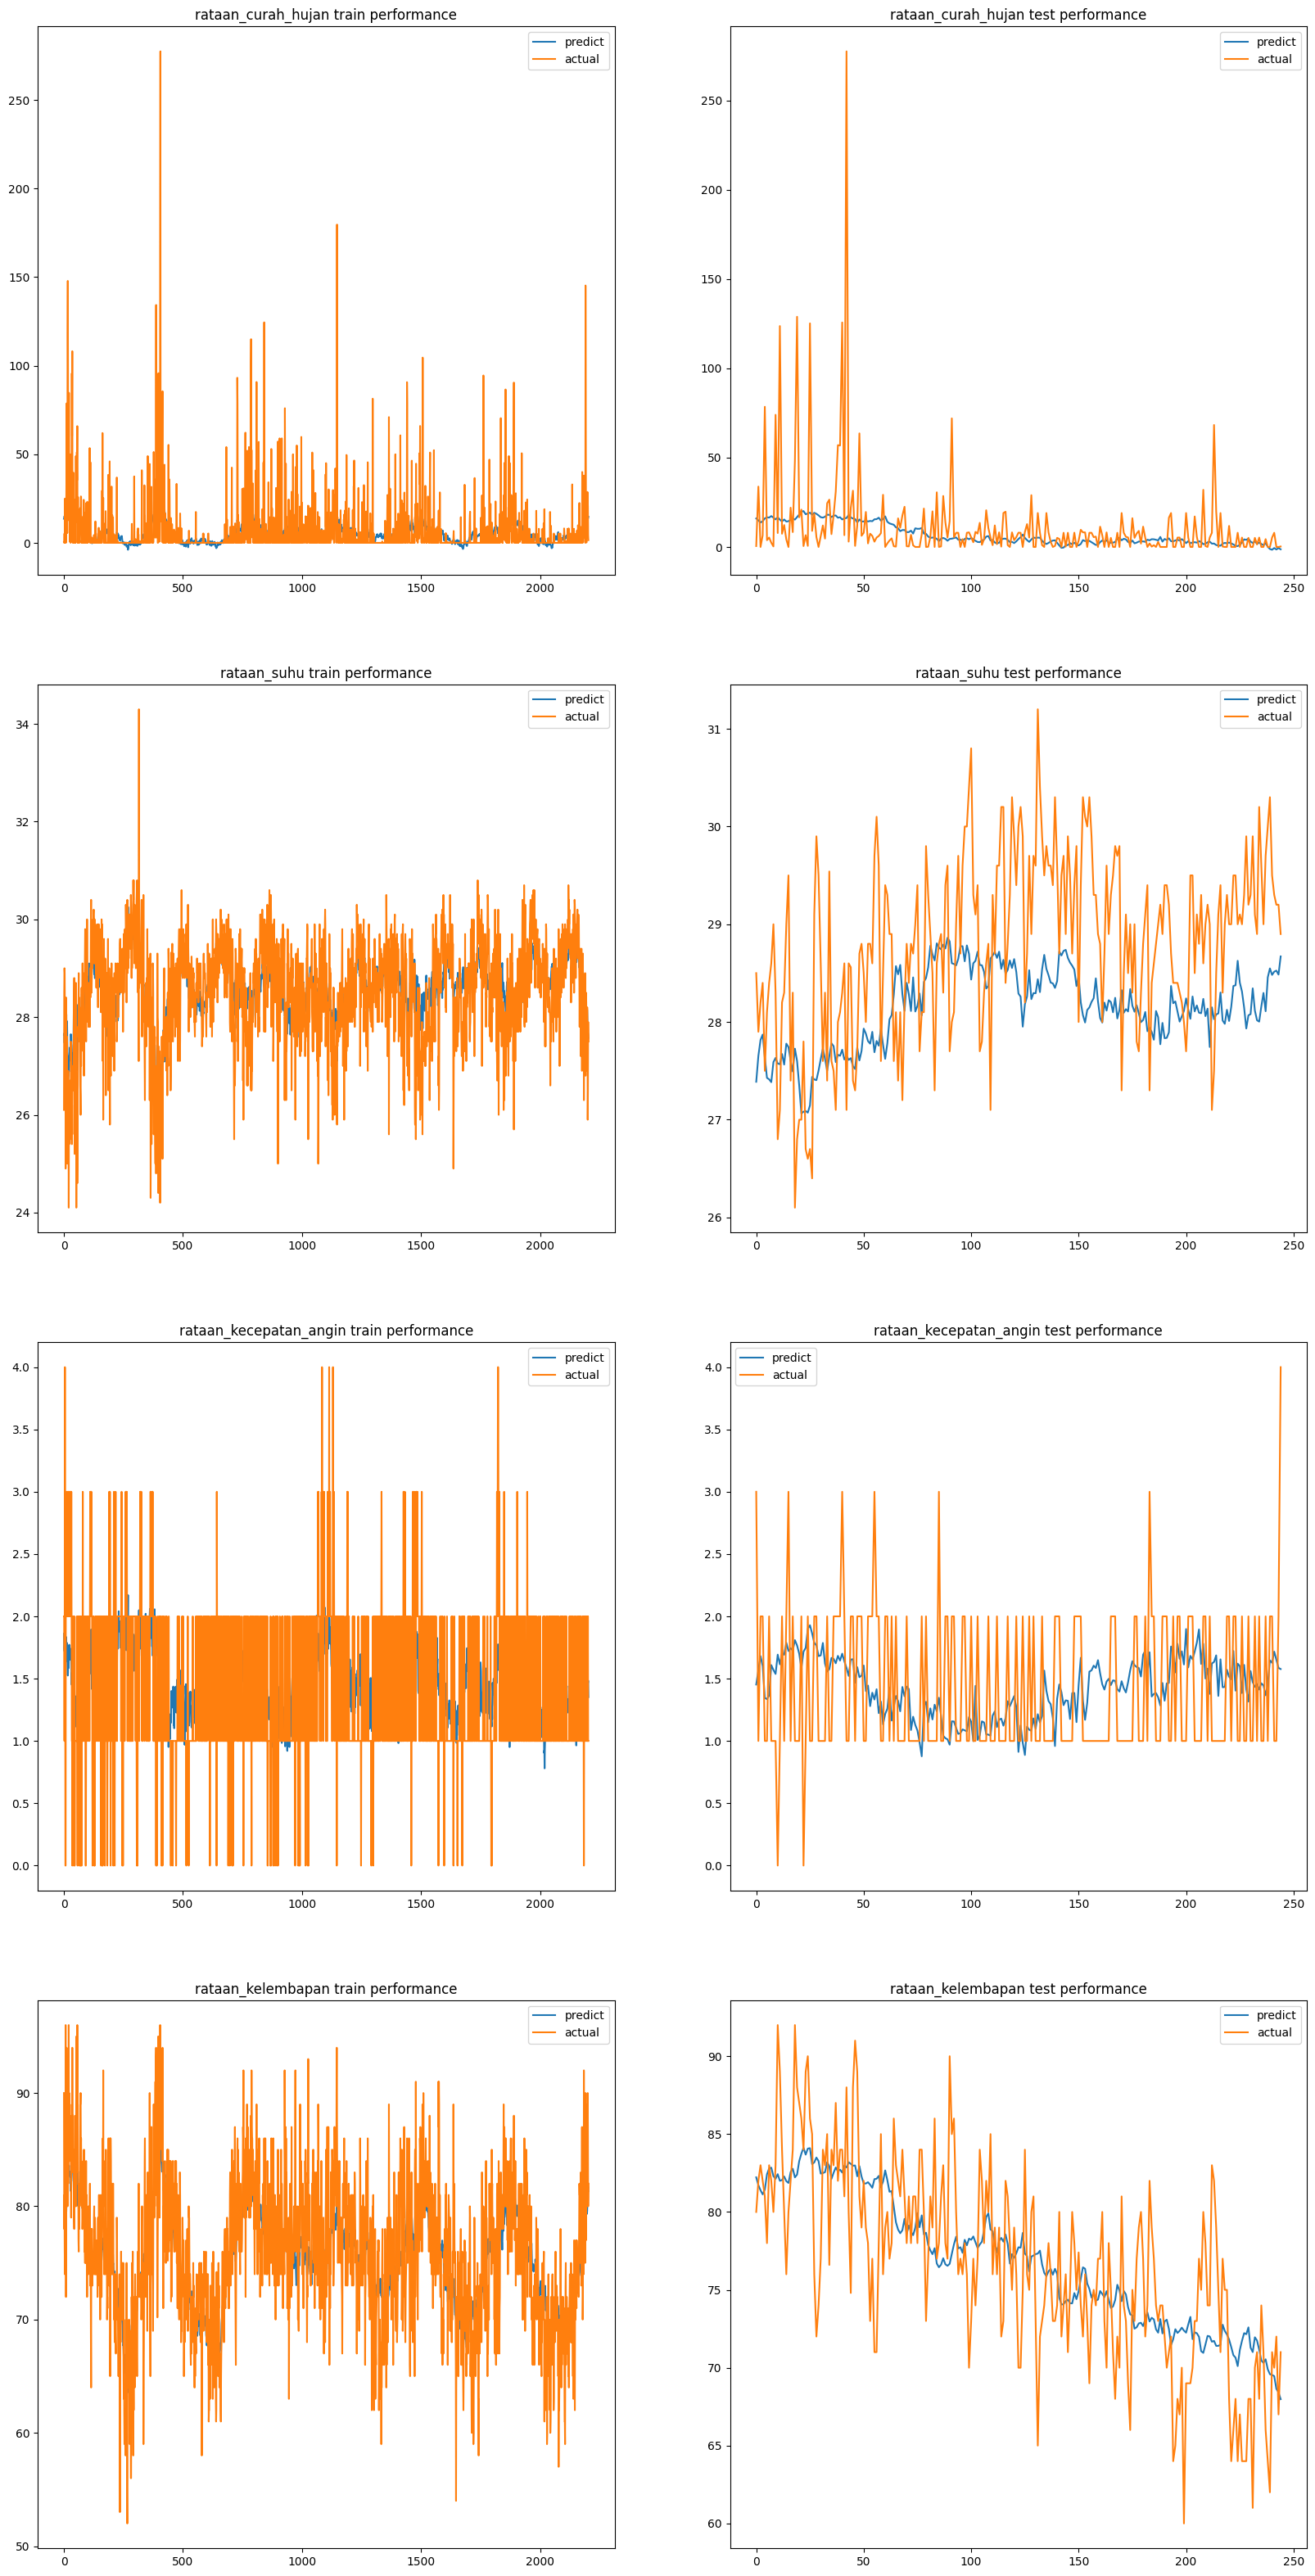

In [87]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (20,40))

for index, column in enumerate(kemayoran1[["rataan_curah_hujan", "rataan_suhu", "rataan_kecepatan_angin", "rataan_kelembapan"]].columns):
  sns.lineplot(x = range(len(Y2_pred_train[:, index])), y = Y2_pred_train[:, index], ax = ax[index, 0], label = "predict")
  sns.lineplot(x = range(len(Y2_pred_train[:, index])), y = Y2_train[:, index], ax = ax[index, 0], label = "actual")
  sns.lineplot(x = range(len(Y2_pred_test[:, index])), y = Y2_pred_test[:, index], ax = ax[index, 1], label = "predict")
  sns.lineplot(x = range(len(Y2_pred_test[:, index])), y = Y2_test[:, index], ax = ax[index, 1], label = "actual")
  ax[index, 0].set_title(f"{column} train performance")
  ax[index, 1].set_title(f"{column} test performance")

plt.show()

In [100]:
model.export("kemayoran")

INFO:tensorflow:Assets written to: kemayoran\assets


INFO:tensorflow:Assets written to: kemayoran\assets


Saved artifact at 'kemayoran'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 365, 4), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  List[TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)]
Captures:
  2052252997760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052252998816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253069728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253071488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253070432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253072192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253073072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253086112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253087168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052253087696: TensorSpec(shape=(), dtype=tf.